# Projeto 1 - Ciência dos Dados

Nome: __Luca Cazzolato Machado__

Turma: __2C__

## Pergunta (s) a ser respondida

O objetivo do projeto é responder como a entrada de refugiadios nos países da União Europeia num período de dez anos afetaram os índices relacionados ao desenvolvimento dos países. Os índices a serem analisados são:

- Número de refugiados
- Desemprego (taxa (%) de desemprego de pessoas com idade 15+)
- Violência (assassinatos) 

## Explicação da hipótese e mecanismo

#### - Introdução
Pessoas ao passar dos anos sempre migraram de um lugar ao outro, porém em situações de risco e ameaças as pessoas são obrigadas a sairem de seu país de origem em busca de um país melhor que possa refugiá-los e oferecer educação emprego, saúde, e todos os direitos humanos que cada cidadão possui, visto que se encontravam em uma situação constante de riscos como: guerras, pressão política e até probeza.

Contudo recentemente muitos refugiados na região do Mediterrâneo começaram a migrar para países da Europa, em busca de melhores condições de vida, esse fluxo atingiu um nível crítico pelo ano de 2015 com um aumento exponencial de centenas de milhares de pessoas buscando refúgio na Europa, os motivos variavam em, guerras, conflitos, intolerância religiosa, etc. Tal ato ficou conhecidor como a Crise migratória na Europa.

A maioria dos países da Europa fazem parte da União Europeia, uma união econômica e política que envolvem 28-países-estados compondo uma integração econômica, social e política, moeda comum, livre circulamento de pessoas e funcionamento por um parlamento europeu gerenciado por países eleitos internamente. É referência como um dos blocos econômico mais desenvolvidos atualmente.

Portanto é viavél identificar se um grande fluxo migratório pode interferir de forma significativa e causar um desequilíbrio em um bloco econômico de grande desenvolvimento.

#### - Hipótese:
A hipótese formulada se baseia em percerber um desequilíbrio não muito significativo nos índices analisados, por conta do grande histórico e desenvolvimento observado na União Européia. Entretato é necessária a análise para confirmação.
De acordo com notícia e sites ciêntificos e notícias a União Europeia está ciente diante sua atual situação e busca ajudar refugiados das melhores formas possíveis de forma que não prejudique e comprometa o bloco econômico e seus participantes. Entretanto não são todos os países que aceitam receber refugiados em seu território, já outros são bem permissívos. Contudo a União Europeia está tomando medidas para ajudar os refugiados tais como: 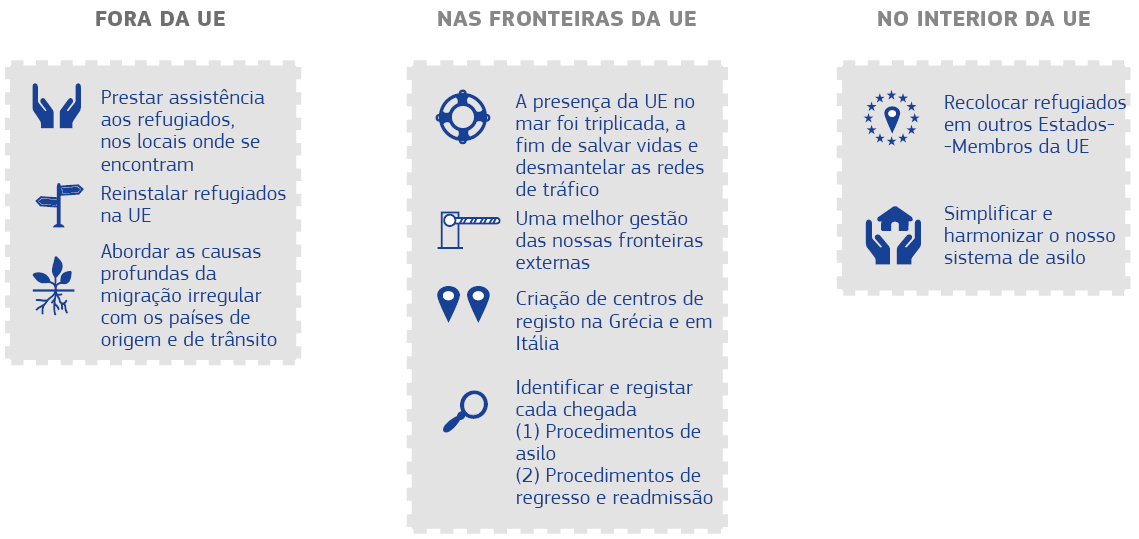
link:http://publications.europa.eu/webpub/com/factsheets/migration-crisis/pt/

#### - Mecanismo:
O mecanismo a ser utilizado será de comparar os índices selecionados com as quantidades maiores de população refugiada num período de dez anos, selecionando os anos mais importantes (2006 e 2016 por exemplo) e também comparar com outros países que não fazem parte da União Européia. Durante o mecanismo será feita a utilização de histogramas para comparar densidades e estabelecer se a média pode ser uma boa representação do comportamento analisado.

## Bases de dados usadas

### Links e fontes utilizadas para obtenção de dados:

#### - "Refugee population by country or territory of asylum",
site: https://www.gapminder.org/data/
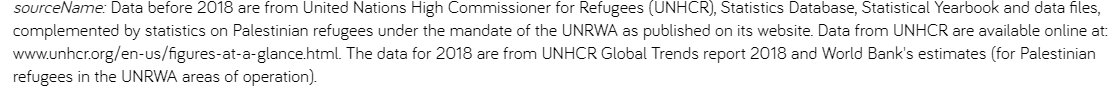

#### - "Total 15+ unemployed (% age 15+ population)",
site: http://www.ilo.org/public/english/employment/strat/kilm/download.htm

#### - "Homicides, total number of deaths",
description: Total number of estimated deaths from interpersonal violence

site: http://www.healthdata.org/

In [1]:
#Importando as bibliotecas

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
#Leitura dos arquivos em Excel

refugee= pd.read_excel('sm_pop_refg.xlsx')
unemployed= pd.read_excel('aged_15plus_unemployment_rate_percent.xlsx')
murder= pd.read_excel('murder_total_deaths.xlsx')

In [3]:
#Escolhendo o ano para cada variável

refugee_2006= refugee.loc[:, ['country', 2006]] 
refugee_2016= refugee.loc[:, ['country', 2016]]
unemployed_2006= unemployed.loc[:, ['country', 2006]] 
unemployed_2016= unemployed.loc[:, ['country', 2016]]
homicides_2006= murder.loc[:,['country', 2006]]
homicides_2016= murder.loc[:,['country', 2016]]

In [4]:
#Mudando os índices:

refugee_idx_2006 = refugee_2006.set_index("country")
unemployed_idx_2006 = unemployed_2006.set_index('country')
murder_idx_2006 = homicides_2006.set_index('country')
refugee_idx_2016 = refugee_2016.set_index("country")
unemployed_idx_2016 = unemployed_2016.set_index('country')
murder_idx_2016 = homicides_2016.set_index('country')

In [5]:
#Join:
join1= refugee_idx_2006.join(unemployed_idx_2006, how='inner', lsuffix='_refugee', rsuffix='_total_unemployed')
dataframe_2006= join1.join(murder_idx_2006, how='inner')
dataframe_2006.columns = ['2006_refugiados','2006_desemprego', '2006_assassinatos']
df_2006= dataframe_2006

join2= refugee_idx_2016.join(unemployed_idx_2016, how='inner', lsuffix='_refugee', rsuffix='_total_unemployed')
dataframe_2016= join2.join(murder_idx_2016, how='inner')
dataframe_2016.columns = ['2016_refugiados','2016_desemprego', '2016_assassinatos']
df_2016= dataframe_2016

In [6]:
#Adicionando label de União Europeia
df_2006["UE"]="Não"
df_2016["UE"]="Não"

df_2006.loc[('Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
    'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain',
    'Sweden', 'United Kingdom'), "UE"]='Sim'

df_2016.loc[('Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 
    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
    'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain',
    'Sweden', 'United Kingdom'), "UE"]='Sim'

In [7]:
#Tabela view 2006
df_2006.head()

,2006_refugiados,2006_desemprego,2006_assassinatos,UE
country,,,,
Afghanistan,35.0,NaN,4850.00,Não
Albania,56.0,NaN,82.90,Não
Algeria,94200.0,12.3,444.00,Não
Angola,13100.0,NaN,876.00,Não
Antigua and Barbuda,NaN,NaN,4.61,Não


In [8]:
#Tabela view 2016
df_2016.head()

,2016_refugiados,2016_desemprego,2016_assassinatos,UE
country,,,,
Afghanistan,59800.0,NaN,6270.00,Não
Albania,138.0,15.2,69.50,Não
Algeria,94200.0,10.2,471.00,Não
Angola,15600.0,NaN,1090.00,Não
Antigua and Barbuda,4.0,NaN,4.85,Não


## Análise de dados

### 1) União Europeia - Refugiados

In [9]:
#Exploração da população refugiada nos anos selecionados. (União Europeia)

#Definindo váriaveis
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_refugiados']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_refugiados']]
refg_2006= df1['2006_refugiados']
refg_2016= df2['2016_refugiados']

In [10]:
#Amplitude da população refugiada nos países.

n=math.sqrt(len(refg_2006))
max_2016 = refg_2016.max()
min_2006 = refg_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 126428.17


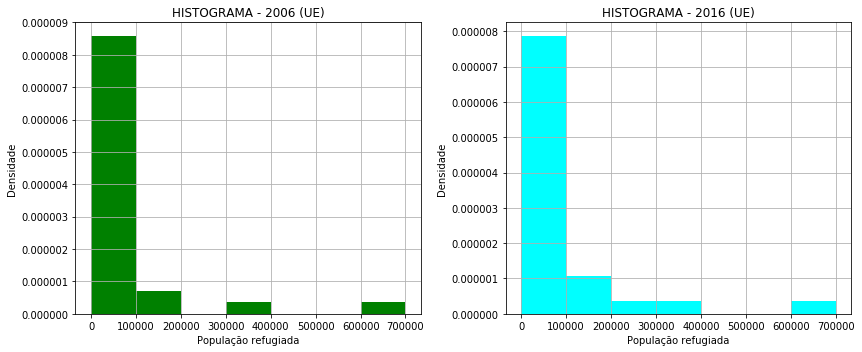

In [11]:
#Histogramas dos anos de 2006, 2016.
faixa = np.arange(min_2006, 700006, 100000)

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = refg_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006 (UE)', density=True, color='green')
plt.ylabel('Densidade')
plt.xlabel('População refugiada')
plt.grid(True)

plt.subplot(132)
plot = refg_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016 (UE)', density=True, color='cyan')
plt.ylabel('Densidade')
plt.xlabel('População refugiada')
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
#Medidas de posição
print('União Europeia:')
print('Média da pop. refugiada ano 2006:', round(refg_2006.mean(), 2))
print('Média da pop. refugiada ano 2016:', round(refg_2016.mean(), 2))
print('Mediana da pop. refugiada ano 2006:', refg_2006.median())
print('Mediana da pop. refugiada ano 2016:', refg_2016.median())
print("Desvio padrão da pop. refugiada ano 2006:", round(refg_2006.std(), 2))
print("Desvio padrão da pop. refugiada ano 2016:", round(refg_2016.std(), 2))

União Europeia:
Média da pop. refugiada ano 2006: 49977.71
Média da pop. refugiada ano 2016: 67447.04
Mediana da pop. refugiada ano 2006: 4890.0
Mediana da pop. refugiada ano 2016: 10090.0
Desvio padrão da pop. refugiada ano 2006: 125990.36
Desvio padrão da pop. refugiada ano 2016: 139738.9


*Realizando a análise de dados entre a população refugiada entre 2006 e 2016 pelos histogramas realizados a primeira visão é que há uma densidade maior de pessoas na faixa de 0-100000 refugiados. Também é perceptível um aumento na densidade das populações refugiadas nas faixas de 100000-300000 e uma diminuição da densidade na faixa de 0-100000 no ano de 2016, possívelmente explicada pelo aumento de população refugiada nos países durante esse o intervalo que a UE recebeou refugiados.* 

*Outra sugestão de acordo com os dados obtidos é pelo desvio padrão receber um valor alto é inválido adotar a média como uma boa medida para fazer comparações, devido a simetria à direita, em que a média se encontra depois da mediana (é maior) provavelmente ocasionada por países que possuem uma maior quantidade de refugiados, portanto a mediana é uma melhor representação da população refugiada distríbuida. Analisando então a mediana percebe-se que houve um aumento considerável de número de populaçoes refugiadas entre o período de 2006-2016.*

### 1.1) Países não pertencentes à União Europeia - Refugiados

In [13]:
#Exploração da população refugiada nos anos selecionados. (Países não pertencentes à UE)

#Definindo variáveis
df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_refugiados']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_refugiados']]
refg_2006= df1['2006_refugiados']
refg_2016= df2['2016_refugiados']

In [14]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(refg_2006))
max_2016 = refg_2016.max()
min_2006 = refg_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 243430.14


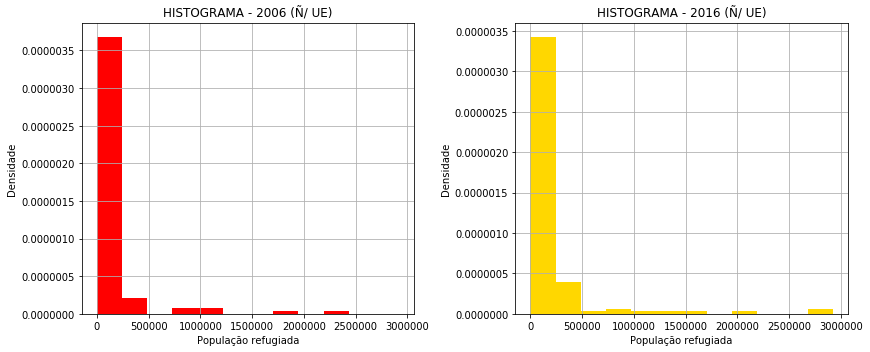

In [15]:
#Histogramas dos anos de 2006, 2015, 2016
faixa = np.arange(min_2006, max_2016+200000, amplitude)

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = refg_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006 (Ñ/ UE)', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('População refugiada')
plt.grid(True)

plt.subplot(132)
plot = refg_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016 (Ñ/ UE)', density=True, color='gold')
plt.ylabel('Densidade')
plt.xlabel('População refugiada')
plt.grid(True)

plt.tight_layout()
plt.show()

In [16]:
#Medidas de posição
print('Países não pertencentes a UE:')
print('Média da pop. refugiada ano 2006:', round(refg_2006.mean(), 2))
print('Média da pop. refugiada ano 2016:', round(refg_2016.mean(), 2))
print('Mediana da pop. refugiada ano 2006:', refg_2006.median())
print('Mediana da pop. refugiada ano 2016:', refg_2016.median())
print("Desvio padrão da pop. refugiada ano 2006:", round(refg_2006.std(), 2))
print("Desvio padrão da pop. refugiada ano 2016:", round(refg_2016.std(), 2))

Países não pertencentes a UE:
Média da pop. refugiada ano 2006: 111040.8
Média da pop. refugiada ano 2016: 162090.61
Mediana da pop. refugiada ano 2006: 4175.0
Mediana da pop. refugiada ano 2016: 4770.0
Desvio padrão da pop. refugiada ano 2006: 326493.04
Desvio padrão da pop. refugiada ano 2016: 456662.72


*A análise de dados dos países não pertencentes a UE demonstra pouca mudança significativa entre o intervalo de tempo 2006-2016, porém há uma presença maior de densidade nas primeiras faixas de população refugiada do gráfico. Por se tratar de população em uma variada gama de países é improvável retirar uma conclusão certa, apenas que representam países heterogêneos.
Sua similiaridade com a União Europeia se baseia na aproximação de países com população refugiada mais baixa na faixa de até 500000.*

### 2) Desemprego - União Européia

In [17]:
#Exploração da população refugiada nos anos selecionados. (UE)

#Definindo variáveis
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_desemprego']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_desemprego']]
unply_2006= df1['2006_desemprego']
unply_2016= df2['2016_desemprego']

In [18]:
#Amplitude dos refugiados dos países da UE.

n=math.sqrt(len(unply_2006))
max_2016 = unply_2016.max()
min_2006 = unply_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 3.7


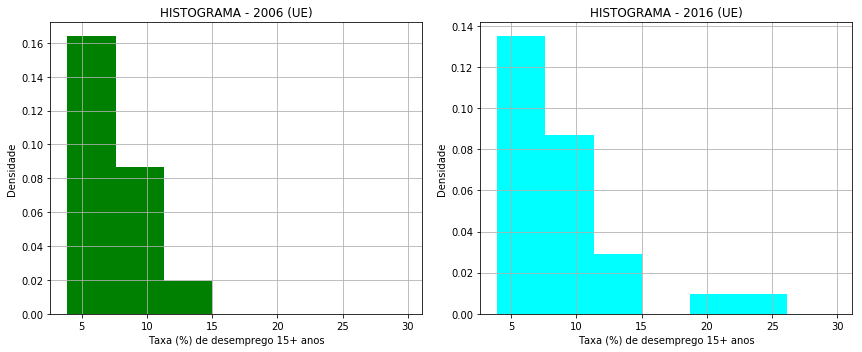

In [19]:
#Histogramas dos anos de 2006, 2016
faixa = np.arange(min_2006, 30, amplitude)

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = unply_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006 (UE)', density=True, color='green')
plt.ylabel('Densidade')
plt.xlabel('Taxa (%) de desemprego 15+ anos')
plt.grid(True)

plt.subplot(132)
plot = unply_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016 (UE)', density=True, color='cyan')
plt.ylabel('Densidade')
plt.xlabel('Taxa (%) de desemprego 15+ anos')
plt.grid(True)

plt.tight_layout()
plt.show()

In [20]:
#Medidas de posição
print('União Europeia:')
print('Média do desemprego ano 2006:', round(unply_2006.mean(), 2))
print('Média do desemprego ano 2016:', round(unply_2016.mean(), 2))
print('Mediana do desemprego ano 2006:', unply_2006.median())
print('Mediana do desemprego ano 2016:', unply_2016.median())
print("Desvio padrão do desemprego ano 2006:", round(unply_2006.std(), 2))
print("Desvio padrão do desemprego ano 2016:", round(unply_2016.std(), 2))

União Europeia:
Média do desemprego ano 2006: 7.37
Média do desemprego ano 2016: 8.67
Mediana do desemprego ano 2006: 7.11
Mediana do desemprego ano 2016: 7.7
Desvio padrão do desemprego ano 2006: 2.53
Desvio padrão do desemprego ano 2016: 4.44


*Com a análise realizada entre o histograma é claramente visível um aumento na taxa de desemprego da população do bloco da UE que pode ter sido ocasionado pela entrada da população refugiada, em que a densidade que representa taxas menores diminuiram dando lugar ao aumento de densidade em porcentagens maiores (faixas 5%-15%) e também um aumento na faixa perto do período de (20%-25%). Além do gráfico os valores obtidos apresentam uma aproximação e um desvio padrão relativamente pequeno portanto é razoável considerar um sitema simétrico e a média é representativa nessa observação.*

### 2.1) Países não pertencentes à União Europeia- Desemprego

In [21]:
#Exploração da população refugiada nos anos selecionados. (Ñ/UE)

#Definindo variáveis
df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_desemprego']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_desemprego']]
unply_2006= df1['2006_desemprego']
unply_2016= df2['2016_desemprego']

In [22]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(unply_2006))
max_2016 = unply_2016.max()
min_2006 = unply_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 2.23


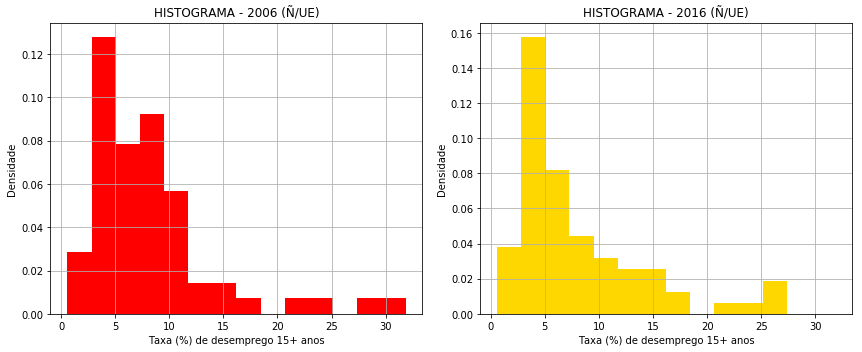

In [23]:
#Histogramas dos anos de 2006, 2016
faixa = np.arange(min_2006, 33, amplitude)

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = unply_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006 (Ñ/UE)', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('Taxa (%) de desemprego 15+ anos')
plt.grid(True)

plt.subplot(132)
plot = unply_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016 (Ñ/UE)', density=True, color='gold')
plt.ylabel('Densidade')
plt.xlabel('Taxa (%) de desemprego 15+ anos')
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
#Medidas de posição
print('Países não pertencentes à UE:')
print('Média do desemprego ano 2006:', round(unply_2006.mean(), 2))
print('Média do desemprego ano 2016:', round(unply_2016.mean(), 2))
print('Mediana do desemprego ano 2006:', unply_2006.median())
print('Mediana do desemprego ano 2016:', unply_2016.median())
print("Desvio padrão do desemprego ano 2006:", round(unply_2006.std(), 2))
print("Desvio padrão do desemprego ano 2016:", round(unply_2016.std(), 2))

Países não pertencentes à UE:
Média do desemprego ano 2006: 8.12
Média do desemprego ano 2016: 7.99
Mediana do desemprego ano 2006: 6.81
Mediana do desemprego ano 2016: 5.605
Desvio padrão do desemprego ano 2006: 5.97
Desvio padrão do desemprego ano 2016: 6.15


*A taxa de desemprego de acordo com a análise dos valores de média e mediana é simétrica, mesmo abraangindo uma grande quantidade de países e é mais densa nas faixas entre 5%-15% no ano de 2006. Já no ano de 2016 percebe-se uma leve diminuição na mesma densidade porém aumento entre as faixas de 10%-20%. Entretanto as alterações em seus resultados não podem ser confirmadas devida à população refugiada em seus países, não há dados suficientes pela grande quantidade de países e inúmeros fatores envolvidos.*

### 3) União Europeia - Violência 

In [49]:
#Exploração da população refugiada nos anos selecionados (Resto do Mundo)

#Definindo variáveis
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_assassinatos']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_assassinatos']]
murder_2006= df1['2006_assassinatos']
murder_2016= df2['2016_assassinatos']

In [26]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(murder_2006))
max_2016 = murder_2016.max()
min_2006 = murder_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 139.19


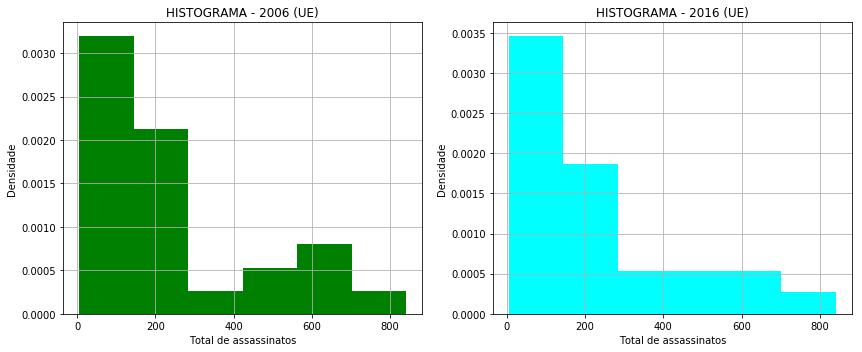

In [27]:
#Histogramas dos anos de 2006,2016
faixa = np.arange(min_2006, 900, amplitude)

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = murder_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006 (UE)', density=True, color='green')
plt.ylabel('Densidade')
plt.xlabel('Total de assassinatos')
plt.grid(True)

plt.subplot(132)
plot = murder_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016 (UE)', density=True, color='cyan')
plt.ylabel('Densidade')
plt.xlabel('Total de assassinatos')
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
#Medidas de posição
print('União Europeia:')
print('Média de assassinatos ano 2006:', round(murder_2006.mean(), 2))
print('Média de assassinatos ano 2016:', round(murder_2016.mean(), 2))
print('Mediana de assassinatos ano 2006:', murder_2006.median())
print('Mediana de assassinatos ano 2016:', murder_2016.median())
print("Desvio padrão de assassinatos ano 2006:", round(murder_2006.std(), 2))
print("Desvio padrão de assassinatos ano 2016:", round(murder_2016.std(), 2))

União Europeia:
Média de assassinatos ano 2006: 264.55
Média de assassinatos ano 2016: 209.66
Mediana de assassinatos ano 2006: 180.0
Mediana de assassinatos ano 2016: 144.5
Desvio padrão de assassinatos ano 2006: 259.23
Desvio padrão de assassinatos ano 2016: 211.2


*Analisando os dados é possível concluir que não houve grandes alterações nas densidades de assassinatos no período de 2006 a 2016, no entanto pode se afirmar que houve uma diminuição ou nivelação na quantidade total de assassinatos. Como há um número relativamente significativo do desvio padrão é certo admtir que na análise o comportamento demonstra ter uma assimetria a direita.* 

### 3.1) Países não pertencentes à União Europeia - Violência

In [50]:
#Exploração da população refugiada nos anos selecionados. (Ñ/UE)

#Definindo as variáveis
df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_assassinatos']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_assassinatos']]
murder_2006= df1['2006_assassinatos']
murder_2016= df2['2016_assassinatos']

In [51]:
#Amplitude dos refugiados dos países da união europeia

n=math.sqrt(len(murder_2006))
max_2016 = murder_2016.max()
min_2006 = murder_2006.min()
amplitude=(max_2016-min_2006)/n
print('Amplitude da classe:', amplitude.round(decimals=2))

Amplitude da classe: 5071.96


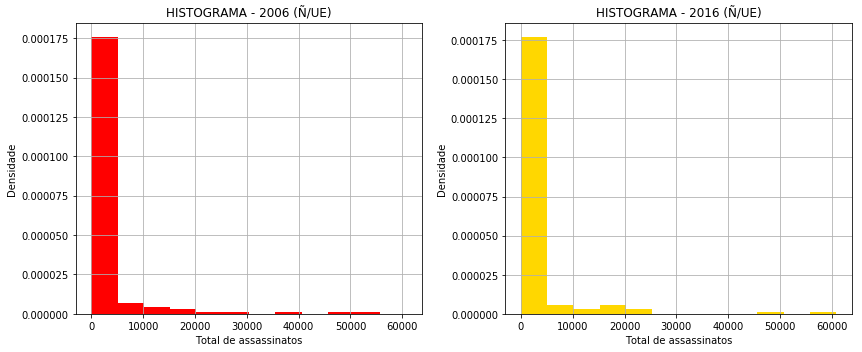

In [52]:
#Histogramas dos anos de 2006, 2016
faixa = np.arange(min_2006, 65000, amplitude)

fig = plt.figure(figsize=(18, 5))
plt.subplot(131)
plot = murder_2006.plot.hist(bins=faixa,title='HISTOGRAMA - 2006 (Ñ/UE)', density=True, color='red')
plt.ylabel('Densidade')
plt.xlabel('Total de assassinatos')
plt.grid(True)

plt.subplot(132)
plot = murder_2016.plot.hist(bins=faixa,title='HISTOGRAMA - 2016 (Ñ/UE)', density=True, color='gold')
plt.ylabel('Densidade')
plt.xlabel('Total de assassinatos')
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
#Medidas de posição
print('Países não pertencentes à UE:')
print('Média de assassinatos ano 2006:', round(murder_2006.mean(), 2))
print('Média de assassinatos ano 2016:', round(murder_2016.mean(), 2))
print('Mediana de assassinatos ano 2006:', murder_2006.median())
print('Mediana de assassinatos ano 2016:', murder_2016.median())
print("Desvio padrão de assassinatos ano 2006:", round(murder_2006.std(), 2))
print("Desvio padrão de assassinatos ano 2016:", round(murder_2016.std(), 2))

Países não pertencentes à UE:
Média de assassinatos ano 2006: 2774.77
Média de assassinatos ano 2016: 2730.82
Mediana de assassinatos ano 2006: 387.0
Mediana de assassinatos ano 2016: 421.0
Desvio padrão de assassinatos ano 2006: 7948.97
Desvio padrão de assassinatos ano 2016: 7670.46


*Os histogramas acima apresentam grande densidade para total de assassinatos na faixa de até 10000, contudo vale ressaltar que há uma assimetria a direita pelo fato de serem muitos países analisadose portando há uma grande heteregeneidade.*

## Análise duas váriaveis quantitativas

In [53]:
#Variáveis

#refugiados
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_refugiados']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_refugiados']]
ue_refg_2006= df1['2006_refugiados']
ue_refg_2016= df2['2016_refugiados']
df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_refugiados']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_refugiados']]
refg_2006= df1['2006_refugiados']
refg_2016= df2['2016_refugiados']

#desemprego
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_desemprego']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_desemprego']]
ue_unply_2006= df1['2006_desemprego']
ue_unply_2016= df2['2016_desemprego']
df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_desemprego']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_desemprego']]
unply_2006= df1['2006_desemprego']
unply_2016= df2['2016_desemprego']

#violencia
df1 = df_2006.loc[(df_2006["UE"]=="Sim"),['2006_assassinatos']]
df2 = df_2016.loc[(df_2016["UE"]=="Sim"),['2016_assassinatos']]
ue_murder_2006= df1['2006_assassinatos']
ue_murder_2016= df2['2016_assassinatos']
df1 = df_2006.loc[(df_2006["UE"]=="Não"),['2006_assassinatos']]
df2 = df_2016.loc[(df_2016["UE"]=="Não"),['2016_assassinatos']]
murder_2006= df1['2006_assassinatos']
murder_2016= df2['2016_assassinatos']


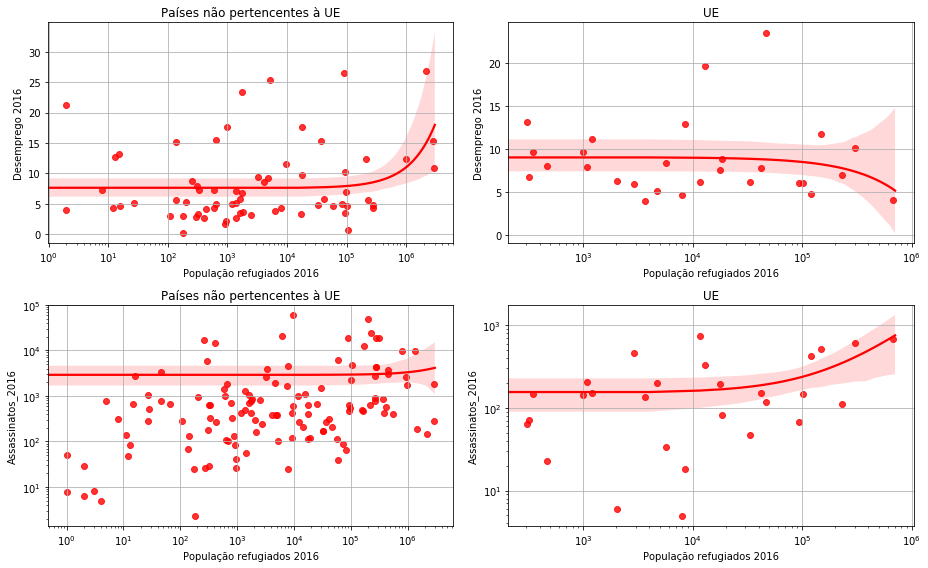

In [67]:
fig = plt.figure(figsize=(13, 8))
plt.subplot(221)
sns.regplot(refg_2016, unply_2016, color=('red'))
plt.xlabel('População refugiados 2016')
plt.ylabel('Desemprego 2016')
plt.xscale('log')
plt.title("Países não pertencentes à UE")
plt.grid()

plt.subplot(222)
sns.regplot(ue_refg_2016, ue_unply_2016, color=('red'))
plt.xlabel('População refugiados 2016')
plt.ylabel('Desemprego 2016')
plt.xscale('log')
plt.title("UE")
plt.grid()

plt.subplot(223)
sns.regplot(refg_2016, murder_2016, color=('red'))
plt.xlabel('População refugiados 2016')
plt.ylabel('Assassinatos_2016')
plt.xscale('log')
plt.yscale('log')
plt.title("Países não pertencentes à UE")
plt.grid()

plt.subplot(224)
sns.regplot(ue_refg_2016, ue_murder_2016, color=('red'))
plt.xlabel('População refugiados 2016')
plt.ylabel('Assassinatos_2016')
plt.xscale('log')
plt.yscale('log')
plt.title("UE")
plt.grid()

plt.tight_layout()
plt.show()

*Analisando os quatro gráficos obtidos no ano de 2016 escolhido pela maior aferência de dados com os acontecimentos da época (como a Crise Migratória da Europa em 2015), é feita a análise que  as amostras dos países não pertencentes à União Europeia não estabelecem uma boa associação de variáveis, demonstrando-se muitos dispersas em relação a linha que representa a relação. Já nos casos da União Europeia, há uma relação maior entre as duas variáveis no entando ela só se faz mais presente na variável Desemprego e População refugiados.*

## Conclusão

A pergunta estabelecida no começo do projeto visava responder questões pertinentes a mudanças nos índices de desemprego, violência e quantidade de refugiados ao longo de um período de 10 anos visto que em 2015 houve uma crise migratória em que grande quantidade de imigrantes refugiados de países em guerra que buscavam asilo na Europa, ou os países da União Europeia.

De acordo com os dados analisados e levando em consideração a sua vericidade e validação, é possível concluir que sim houve uma mudança nos índices: O primeiro que pode ser mais considerado é a quantidade de população refugiada que aumenta em grande quantidade, embora por não ser todos países que aceitam refugiados e nem muitos países se observa que a maioria da população se encontra divida em porções pequenas, entretanto há exceções como o caso da Alemanha que é bem receptiva e aceita uma grande quantidade de imigrantes. Quanto ao índice de desemprego, foi o que mais mostrou mudança significativa aumentando a densidade dos gráficos realizados em faixas maiores, condizendo assim que a entrada de imigrantes refugiados nos países da UE ocasiona em uma maior demanda de trabalho e logo pode colocar em risco os empregos dos nativos. E por último o que menos mostrou diferença, no caso a diferença foi a diminuição de assassinatos durante os anos de 2006 - 2016 o que demonstra uma baixa violência no país e boa segurança.

Portanto de acordo com os dados e pesquisas e notícias a maior conclusão e resposta que se pode obter é que de fato a União Europeia não está sendo afetada negativamente e prejudicada pela presença de novos imigrantes, o que é justificável pela sua estrutura de bloco econômico que preza pela integridade e nivelamento de todos países participantes, mas isso não significa que ela está preparada para lidar de maneira certa. Alguns países são bem restritos e portanto não concordam em receber refugiados, mesmo assim há medidas que vêm sendo tomadas para um melhor manuseamento na entrada de novos imigrantes refugiados de forma que não altere a estrutura do bloco.

## Referências

https://pt.wikipedia.org/wiki/Crise_migrat%C3%B3ria_na_Europa

gazetadopovo.com.br/mundo/5-coisas-que-voce-precisa-saber-sobre-imigracao-na-uniao-europeia-6myuwmg7vnozg6fcf7ilykjpq/